### Illustrate the zero forcing process on a grid graph

In [1]:
def zf_process(g, B):
    """
    Run the zero forcing process and return each step
    
    INPUT:
    
    - ``g`` -- simple graph;
    
    - ``B`` -- a list; the set of initial blue vertices;
    
    OUTPUT: a list of new blue vertices at each step.
    """
    again = True
    cb = copy(B) ### current blue vertices
    record = [copy(B)]
    forces = [[]]
    
    while again:
        again = False
        
        new_v = []
        new_f = []
        for v in cb:
            wb = [u for u in g.neighbors(v) if u not in cb]
            if len(wb) == 1:
                new_v.append(wb[0])
                new_f.append((v,wb[0]))
                again = True
        
        ### update and record
        if again:
            cb += new_v
            record.append(new_v)
            forces.append(new_f)
    
    return record, forces
    

In [2]:
g = graphs.CycleGraph(10)
B = [0,1]

In [3]:
zf_process(g, B)

([[0, 1], [9, 2], [8, 3], [7, 4], [6, 5]],
 [[], [(0, 9), (1, 2)], [(9, 8), (2, 3)], [(8, 7), (3, 4)], [(7, 6), (4, 5)]])

In [5]:
forces

[[],
 [((0, 0), (0, 1)), ((1, 0), (1, 1)), ((2, 0), (2, 1)), ((3, 0), (3, 1))],
 [((0, 1), (0, 2)), ((1, 1), (1, 2)), ((2, 1), (2, 2)), ((3, 1), (3, 2))],
 [((0, 2), (0, 3)), ((1, 2), (1, 3)), ((2, 2), (2, 3)), ((3, 2), (3, 3))],
 [((0, 3), (0, 4)), ((1, 3), (1, 4)), ((2, 3), (2, 4)), ((3, 3), (3, 4))],
 [((0, 4), (0, 5)), ((1, 4), (1, 5)), ((2, 4), (2, 5)), ((3, 4), (3, 5))],
 [((0, 5), (0, 6)), ((1, 5), (1, 6)), ((2, 5), (2, 6)), ((3, 5), (3, 6))]]

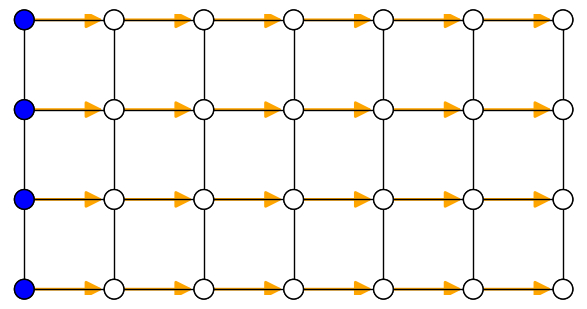

In [7]:
### a test of the process
m,n = 4,7 ### assume m < n

g = graphs.Grid2dGraph(4,7)
g_pos = g.get_pos()

B = [(i,0) for i in range(m)]
rec, forces = zf_process(g,B)

step = 0
lb = sum(rec[:step],[])
db = rec[step]
wh = [v for v in g.vertices() if v not in lb and v not in db]
c = {'lightblue': lb, 'blue': db, 'white': wh}

# arrows = DiGraph([g.vertices(), forces[step]], pos=g_pos)
forcing_chain = [((i,j),(i,j+1)) for i in range(m) for j in range(n-1)]
arrows = DiGraph([g.vertices(), forcing_chain], pos=g_pos)

pic1 = g.plot(vertex_colors=c, vertex_labels=False)
pic2 = arrows.plot(vertex_labels=false, vertex_colors=c, edge_colors={'orange': arrows.edges(labels=False)})

new_pic = pic1 + pic2
new_pic.axes(False)
new_pic

In [8]:
new_pic.save_image('test.png')

In [111]:
m,n = 4,7 ### assume m < n
size = [2*m, 2*n] ### size for figsize

g = graphs.Grid2dGraph(m,n)
g_pos = g.get_pos()

B = [(i,0) for i in range(m)]
rec, forces = zf_process(g,B)

pics = []

for step in range(len(rec)):
    lb = sum(rec[:step],[])
    db = rec[step]
    wh = [v for v in g.vertices() if v not in lb and v not in db]
    c = {'lightblue': lb, 'blue': db, 'white': wh}

    arrows = DiGraph([g.vertices(), forces[step]], pos=g_pos)

    g_pic = g.plot(figsize=size, 
                   vertex_colors=c, 
                   vertex_labels=False)
    g_pic += arrows.plot(figsize=size, 
                         vertex_labels=false, 
                         vertex_colors=c, 
                         edge_colors={'orange': arrows.edges(labels=False)})
    g_pic.axes(False)
    pics.append(g_pic)
    
### the final step: no more forces
lb = sum(rec,[]) 
wh = [v for v in g.vertices() if v not in lb]
c = {'lightblue': lb, 'white': wh}
final_state = g.plot(figsize=size, 
                     vertex_colors=c, 
                     vertex_labels=False)
pics.append(final_state)

Animation with 8 frames
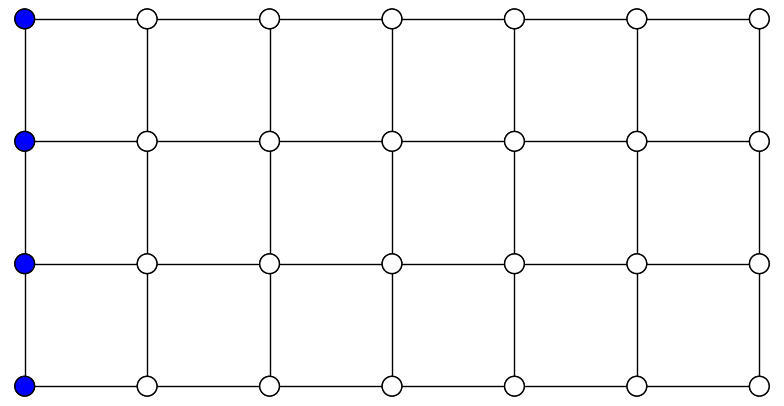

In [112]:
grid_animate = animate(pics)
grid_animate

In [113]:
grid_animate.save('grid_animate.gif', delay=50)

# Perturbation illustration

In [7]:
reset()

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
### assume that lambdas = 1,3
### trace = 4, det = 3
### parameterized equation:
### x = 2 - cos theta
### y = 2 + cos theta
### z = sin theta

('Writing to', 'iso-src/iso000.png', ', height is', 0.0)
('Cropping', 'iso-src/iso000.png')
('Writing to', 'iso-src/iso001.png', ', height is', 0.02040816326530612)
('Cropping', 'iso-src/iso001.png')
('Writing to', 'iso-src/iso002.png', ', height is', 0.04081632653061224)
('Cropping', 'iso-src/iso002.png')
('Writing to', 'iso-src/iso003.png', ', height is', 0.061224489795918366)
('Cropping', 'iso-src/iso003.png')
('Writing to', 'iso-src/iso004.png', ', height is', 0.08163265306122448)
('Cropping', 'iso-src/iso004.png')
('Writing to', 'iso-src/iso005.png', ', height is', 0.1020408163265306)
('Cropping', 'iso-src/iso005.png')
('Writing to', 'iso-src/iso006.png', ', height is', 0.12244897959183673)
('Cropping', 'iso-src/iso006.png')
('Writing to', 'iso-src/iso007.png', ', height is', 0.14285714285714285)
('Cropping', 'iso-src/iso007.png')
('Writing to', 'iso-src/iso008.png', ', height is', 0.16326530612244897)
('Cropping', 'iso-src/iso008.png')
('Writing to', 'iso-src/iso009.png', ', heig

/usr/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


('Cropping', 'iso-src/iso020.png')
('Writing to', 'iso-src/iso021.png', ', height is', 0.42857142857142855)
('Cropping', 'iso-src/iso021.png')
('Writing to', 'iso-src/iso022.png', ', height is', 0.44897959183673464)
('Cropping', 'iso-src/iso022.png')
('Writing to', 'iso-src/iso023.png', ', height is', 0.4693877551020408)
('Cropping', 'iso-src/iso023.png')
('Writing to', 'iso-src/iso024.png', ', height is', 0.4897959183673469)
('Cropping', 'iso-src/iso024.png')
('Writing to', 'iso-src/iso025.png', ', height is', 0.5102040816326531)
('Cropping', 'iso-src/iso025.png')
('Writing to', 'iso-src/iso026.png', ', height is', 0.5306122448979591)
('Cropping', 'iso-src/iso026.png')
('Writing to', 'iso-src/iso027.png', ', height is', 0.5510204081632653)
('Cropping', 'iso-src/iso027.png')
('Writing to', 'iso-src/iso028.png', ', height is', 0.5714285714285714)
('Cropping', 'iso-src/iso028.png')
('Writing to', 'iso-src/iso029.png', ', height is', 0.5918367346938775)
('Cropping', 'iso-src/iso029.png')


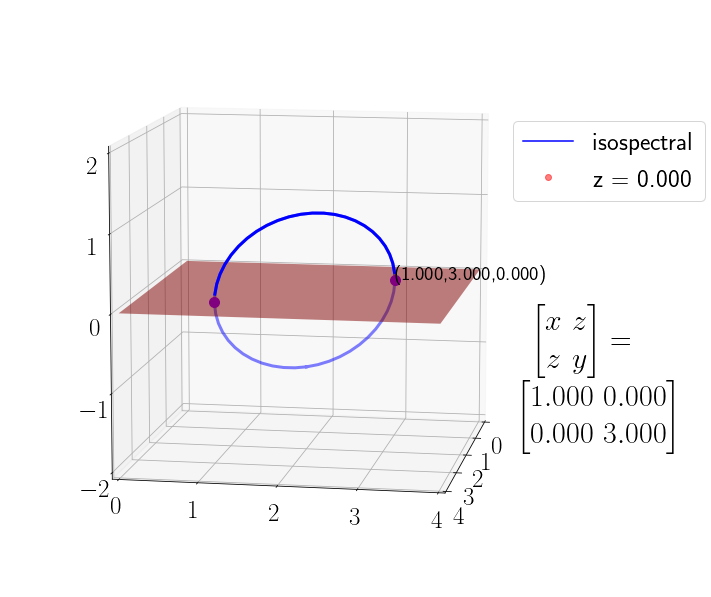

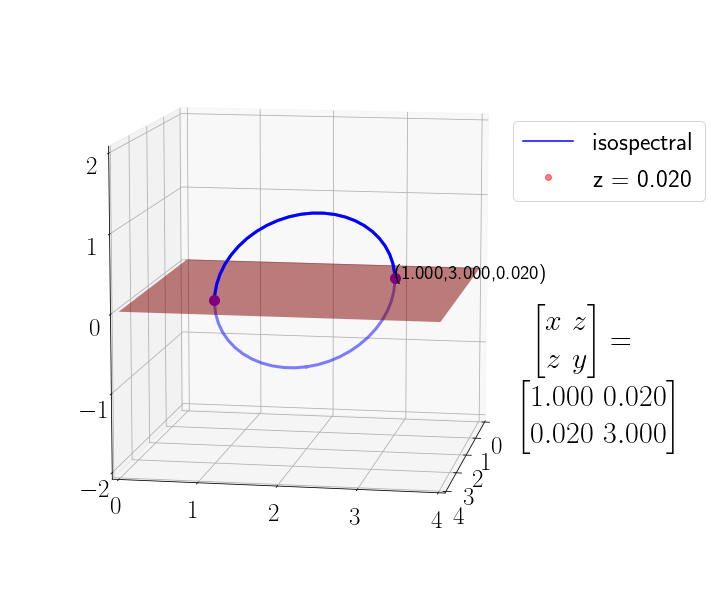

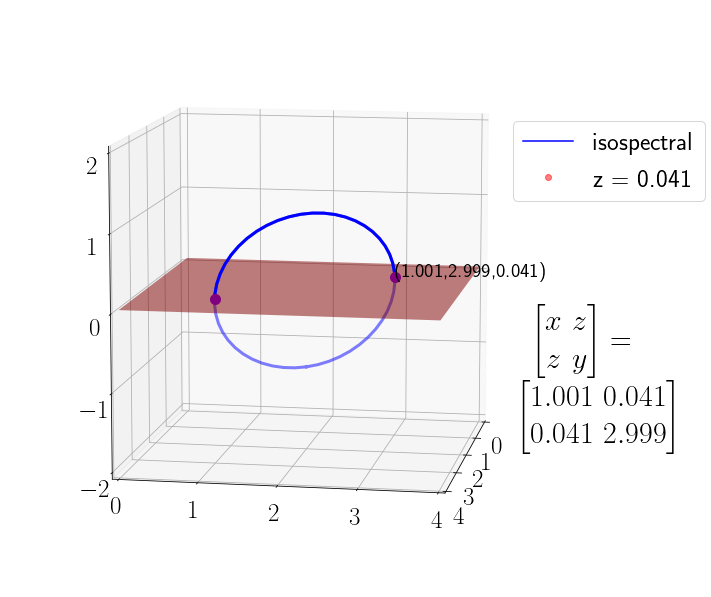

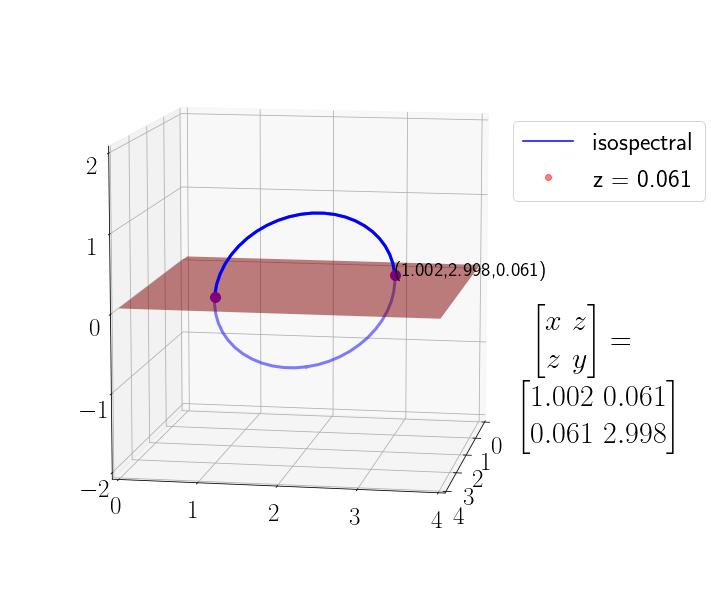

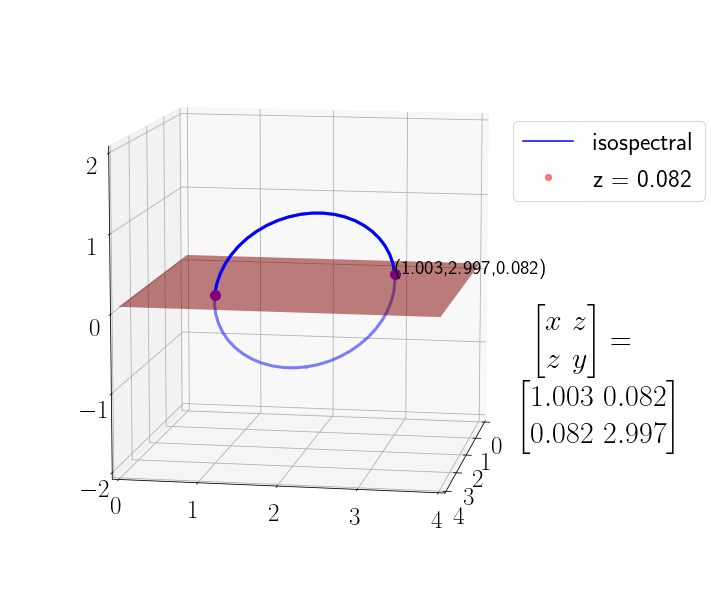

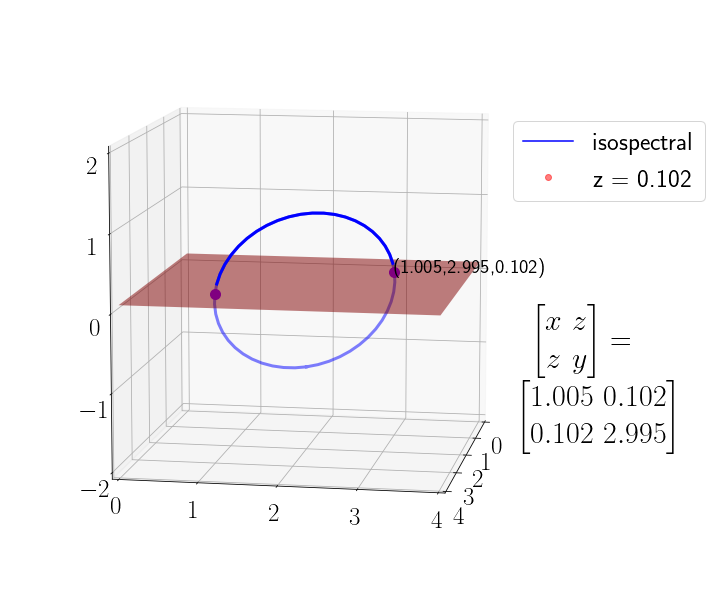

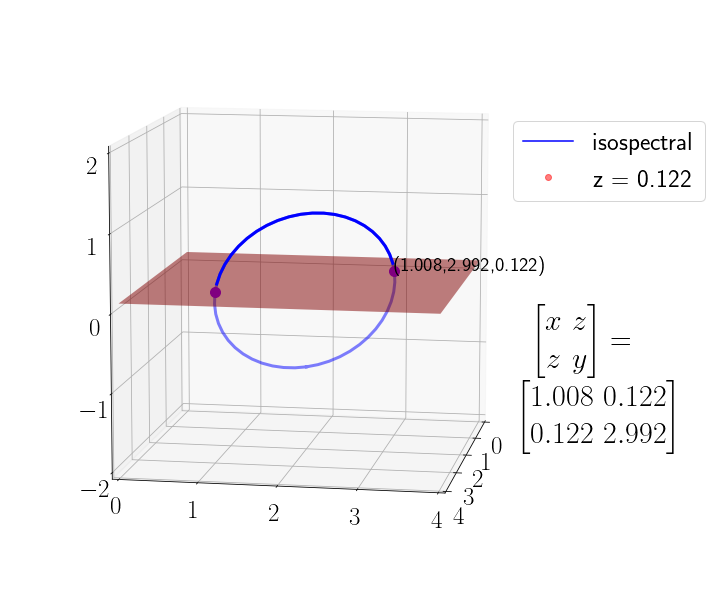

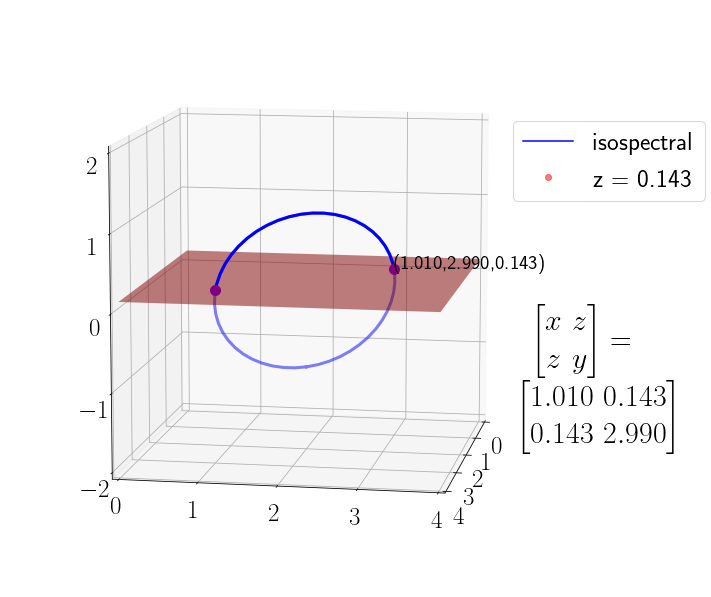

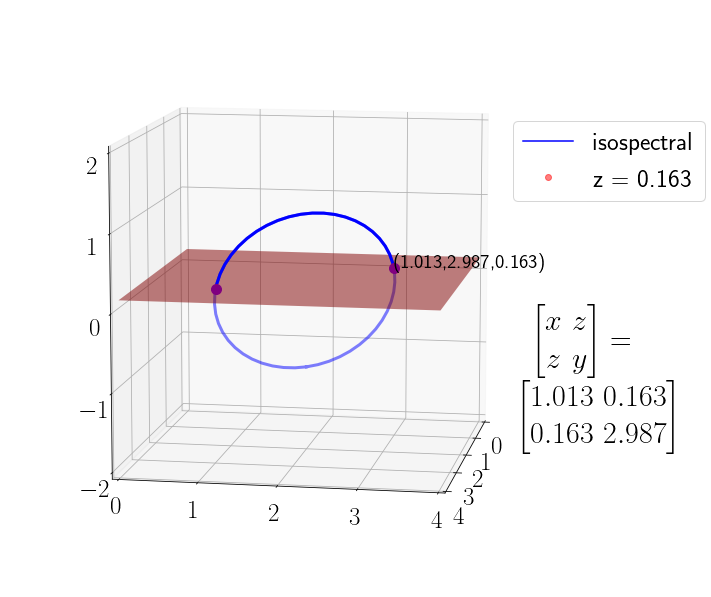

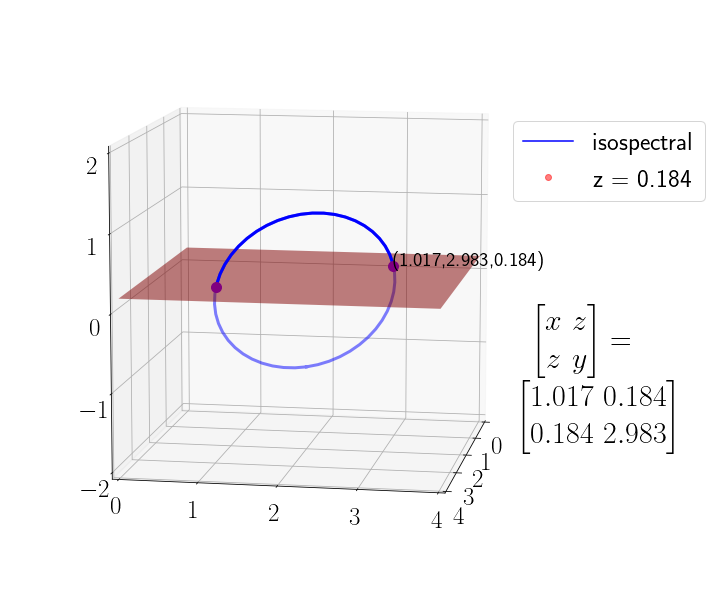

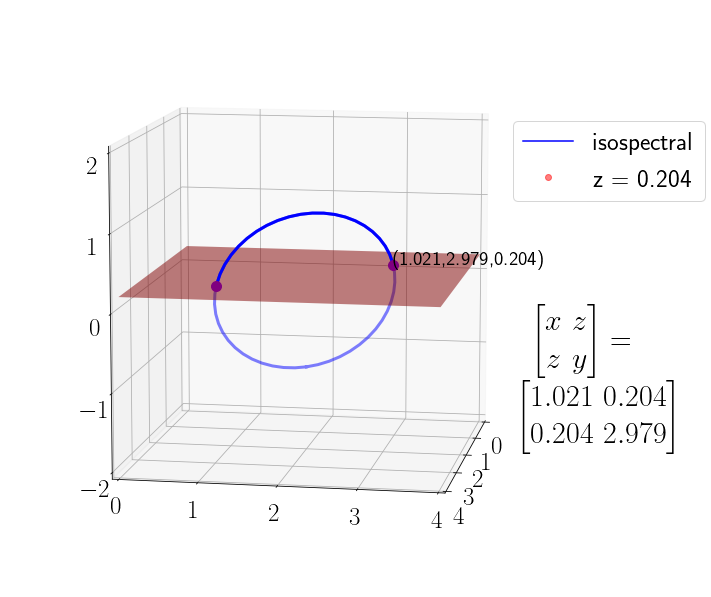

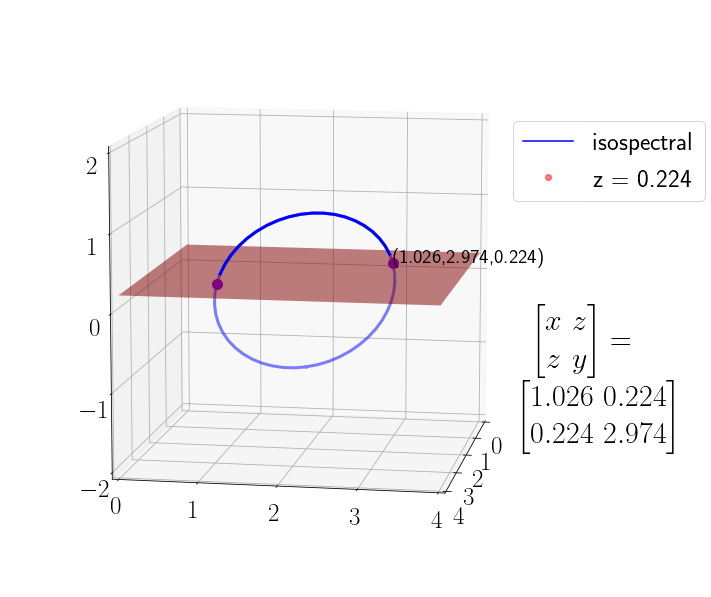

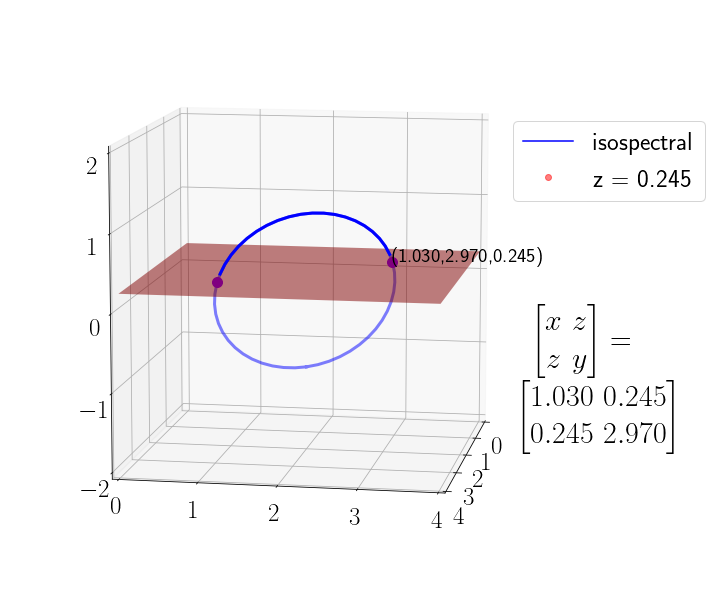

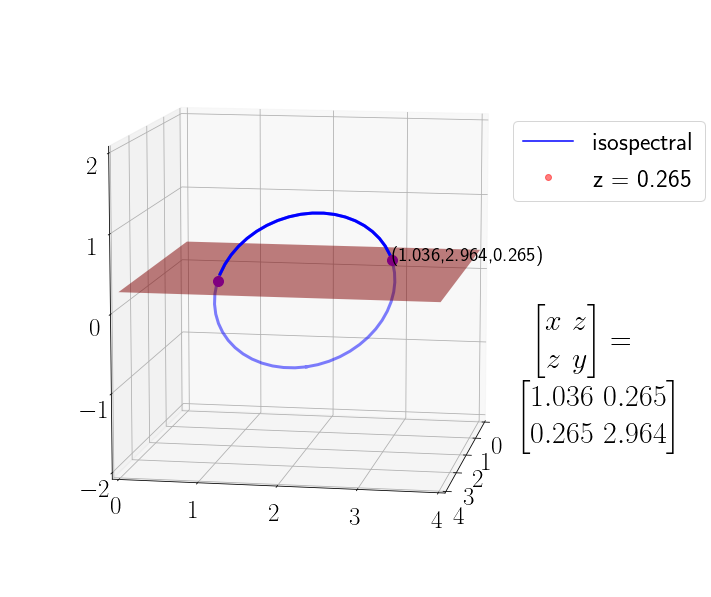

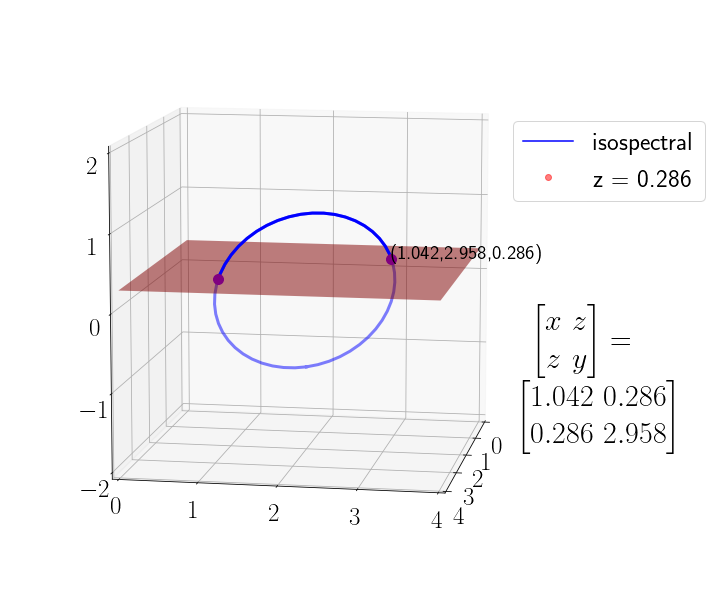

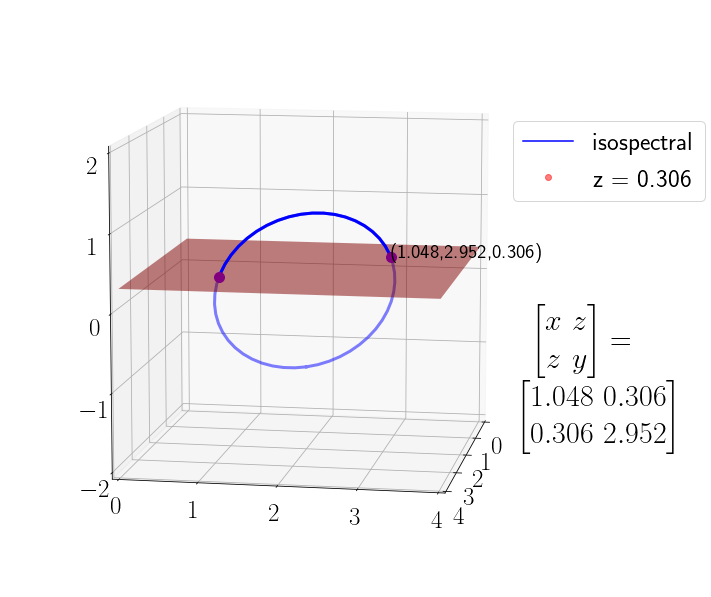

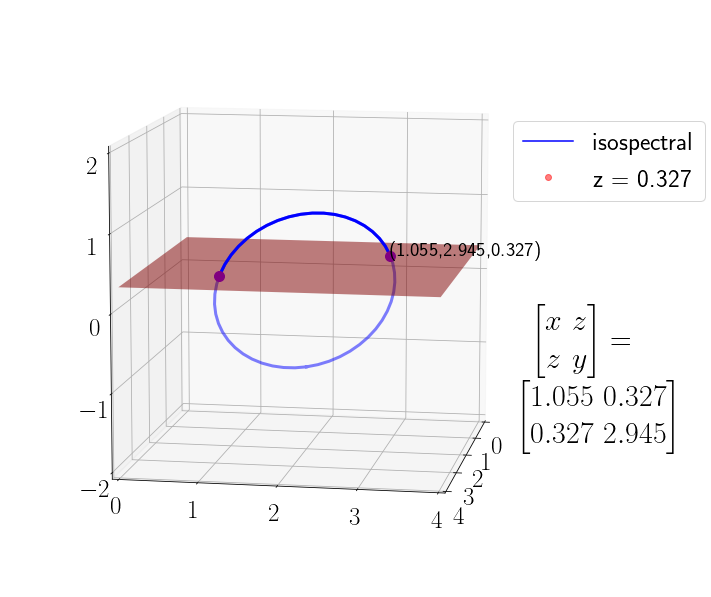

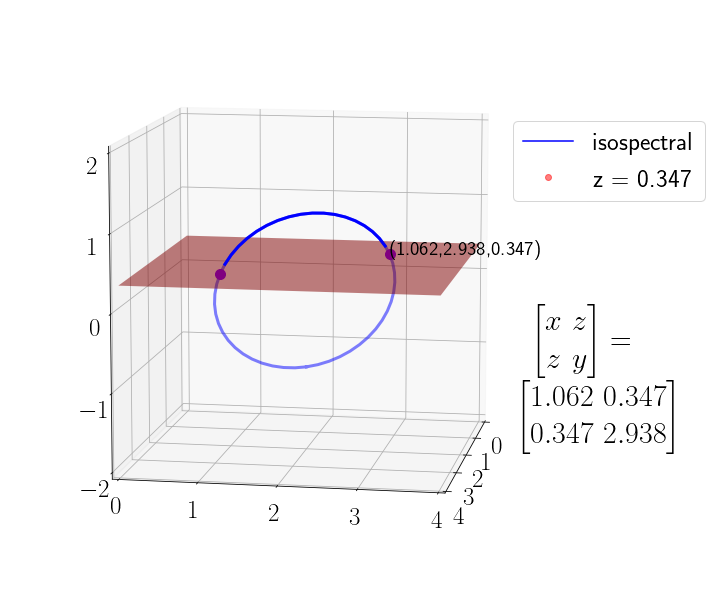

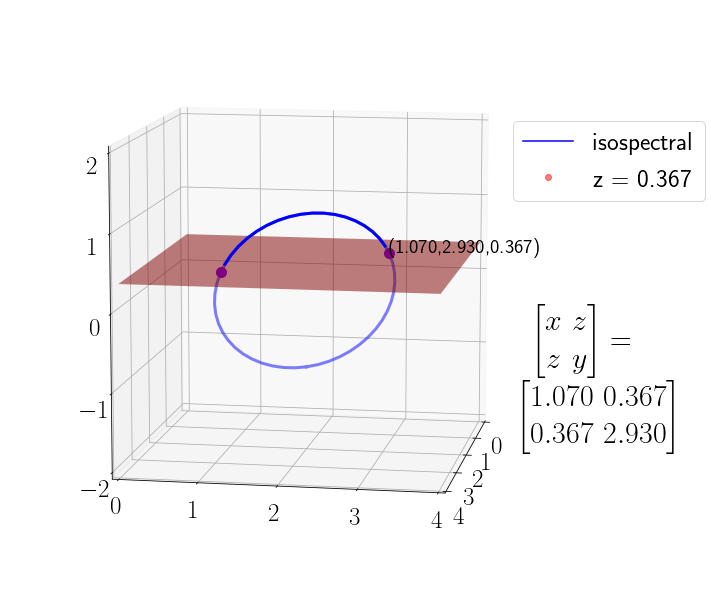

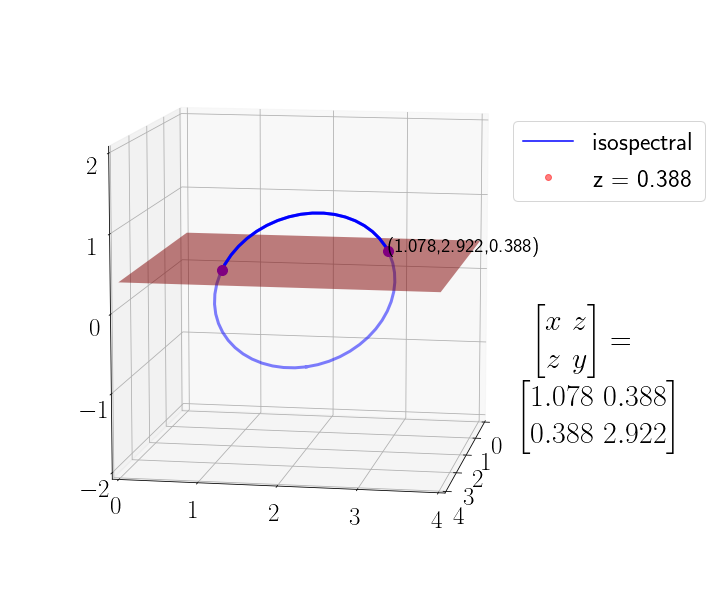

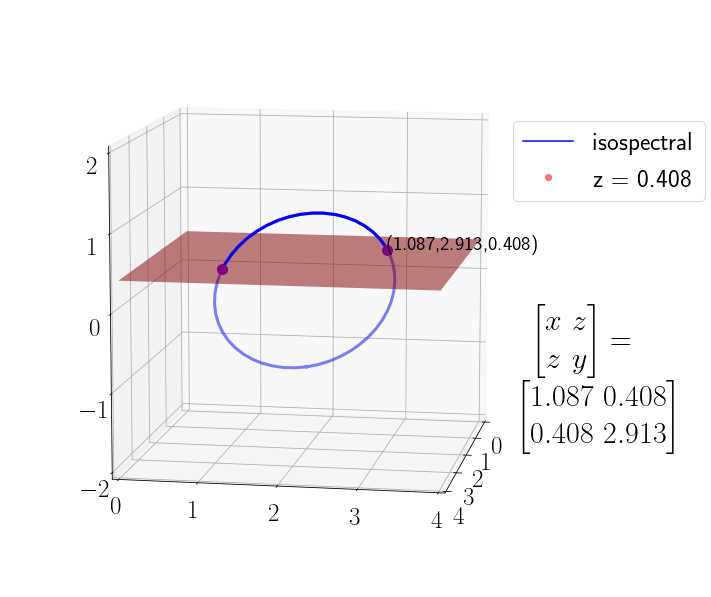

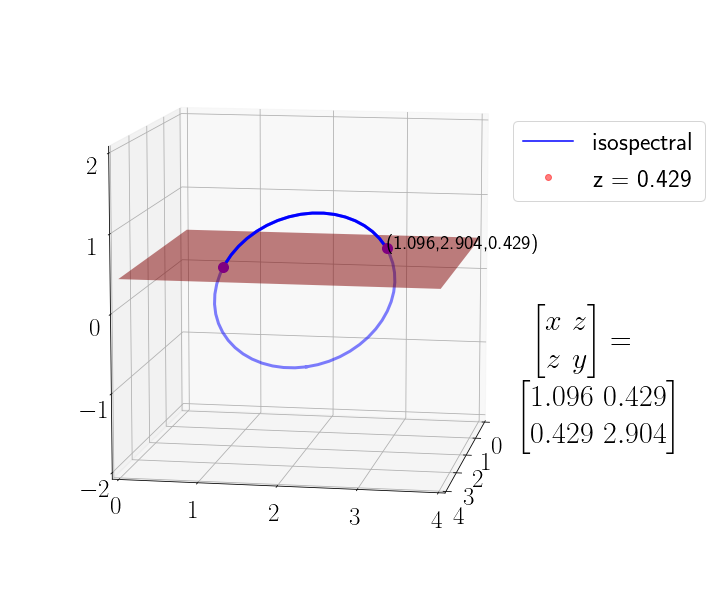

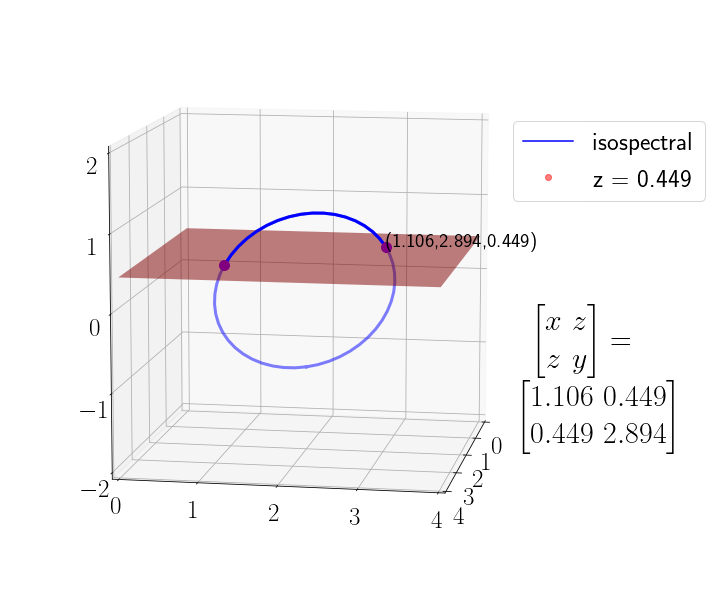

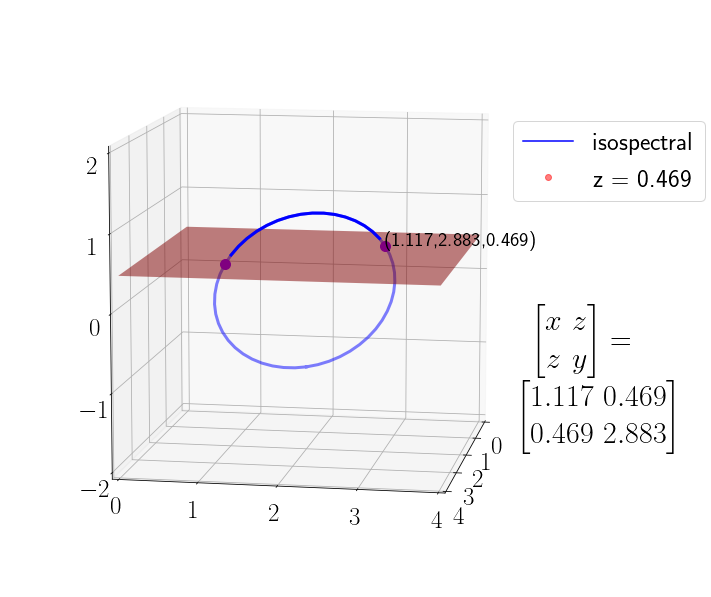

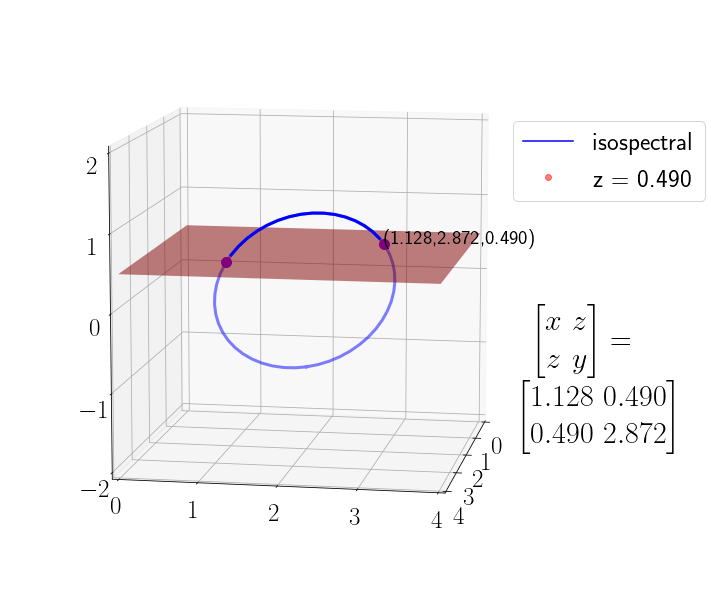

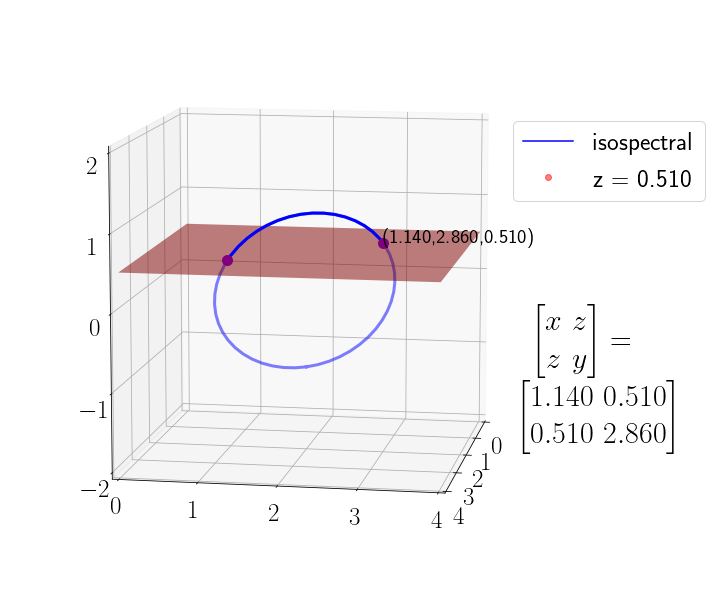

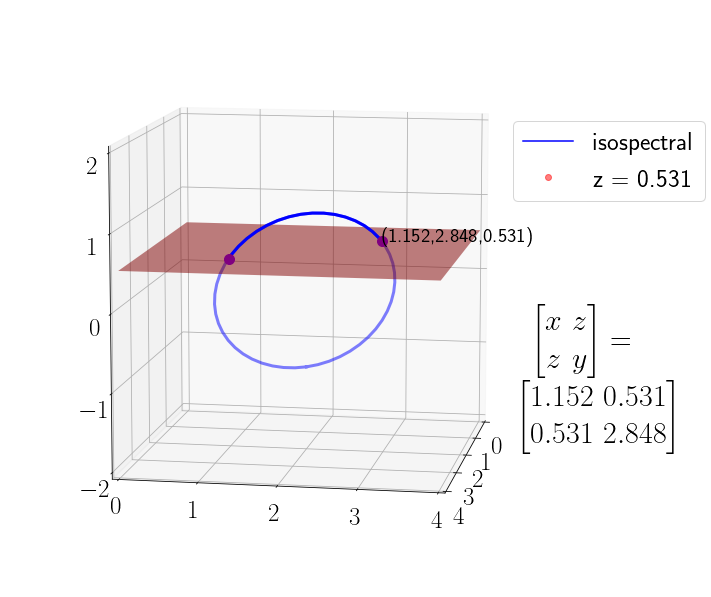

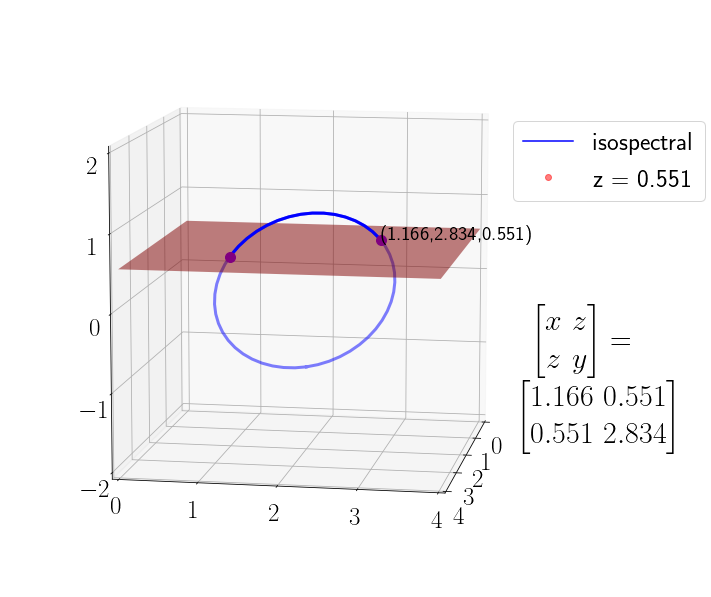

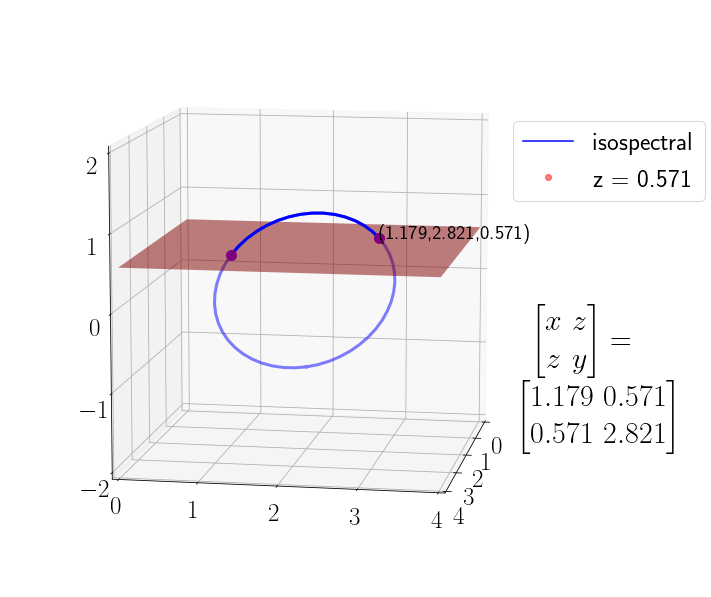

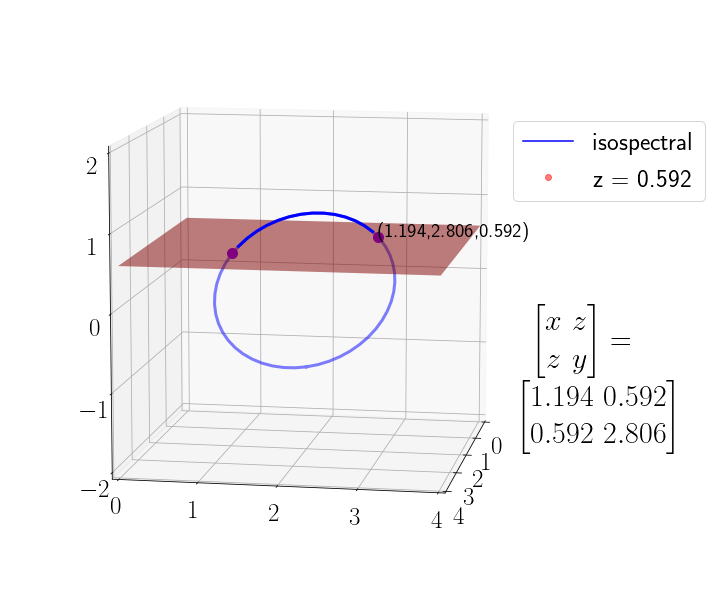

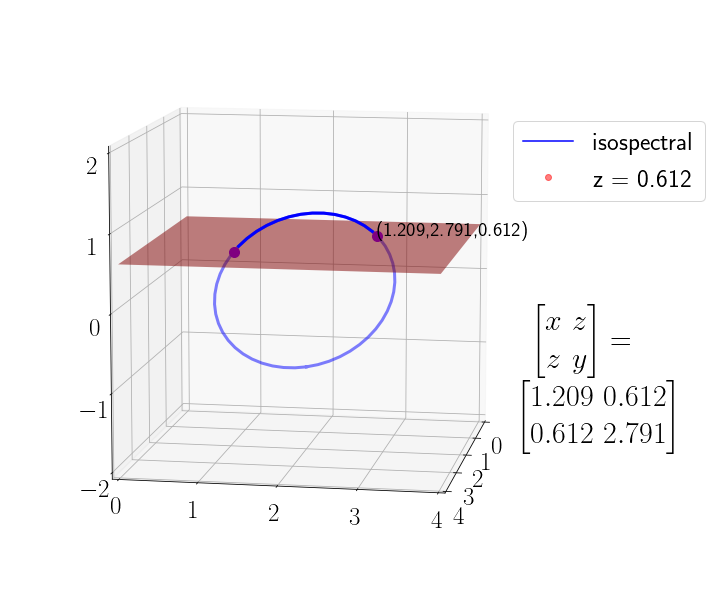

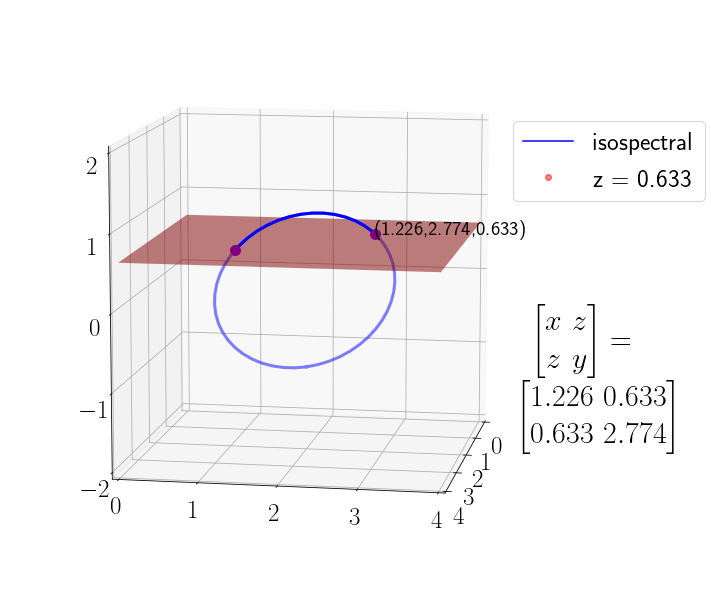

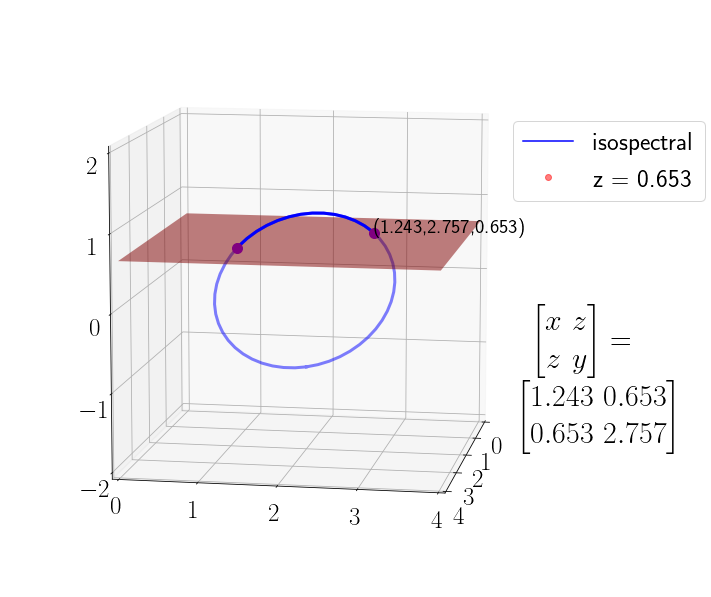

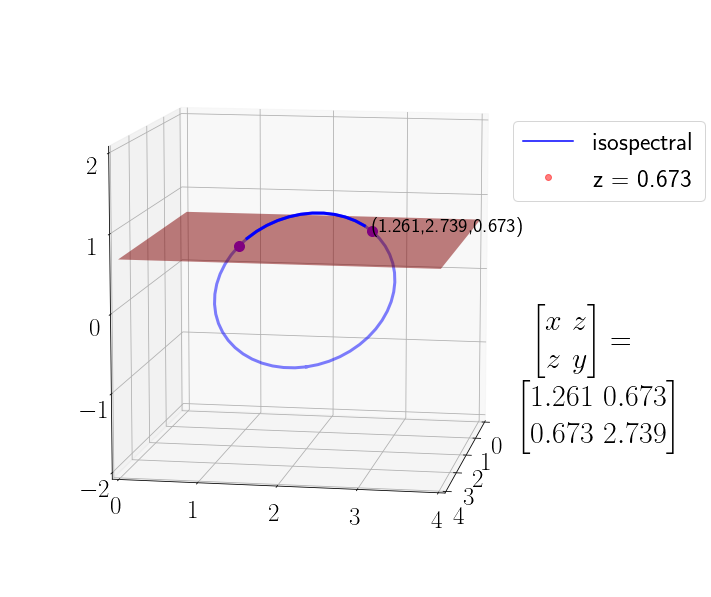

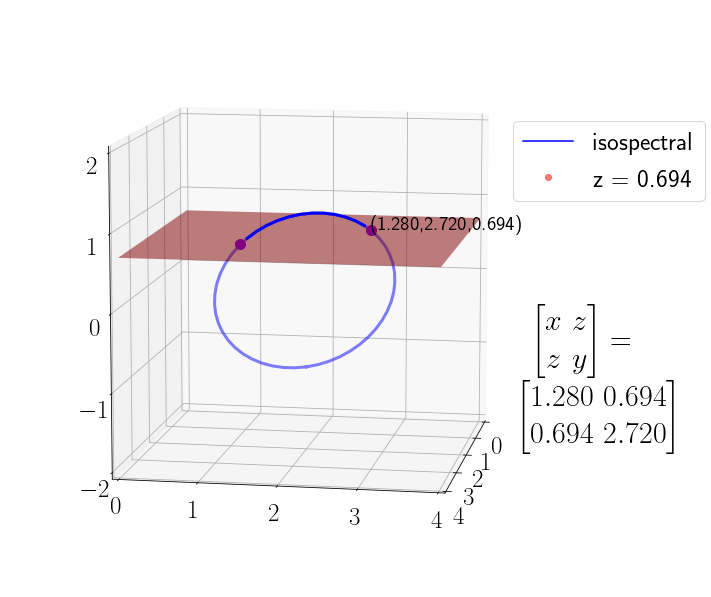

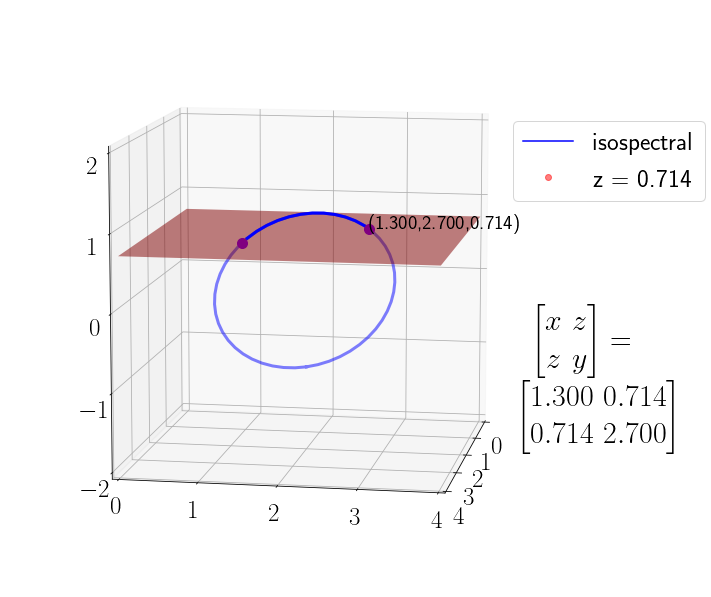

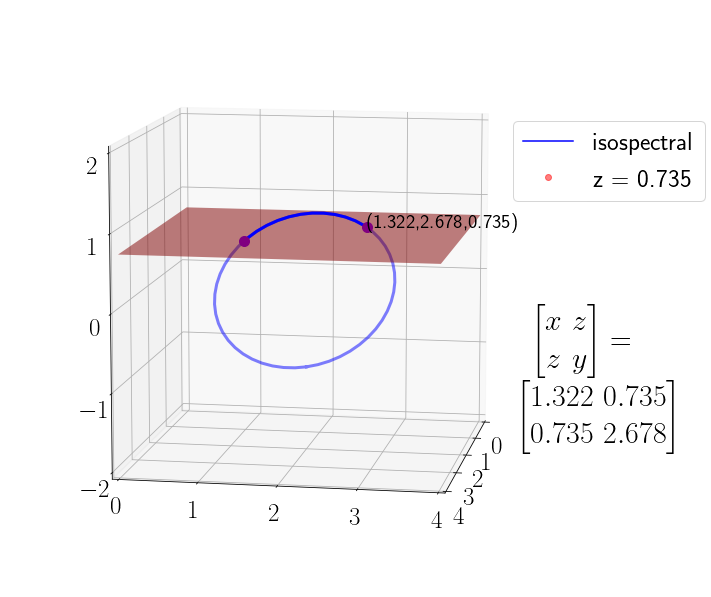

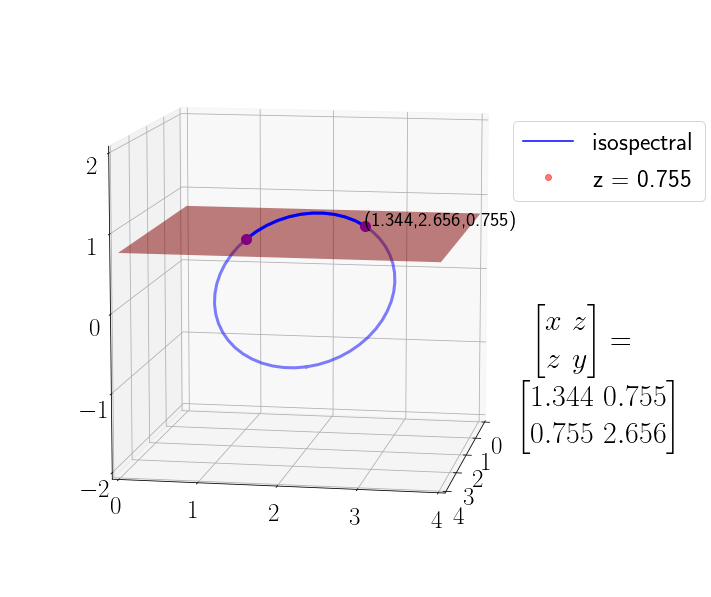

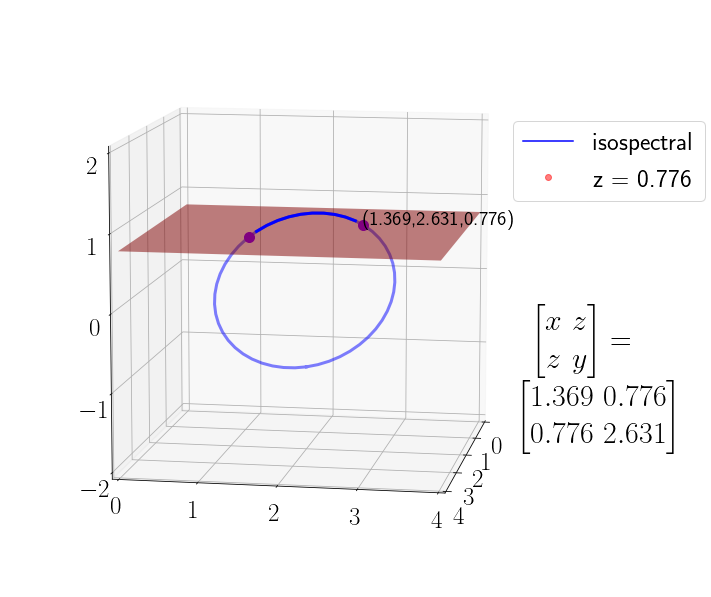

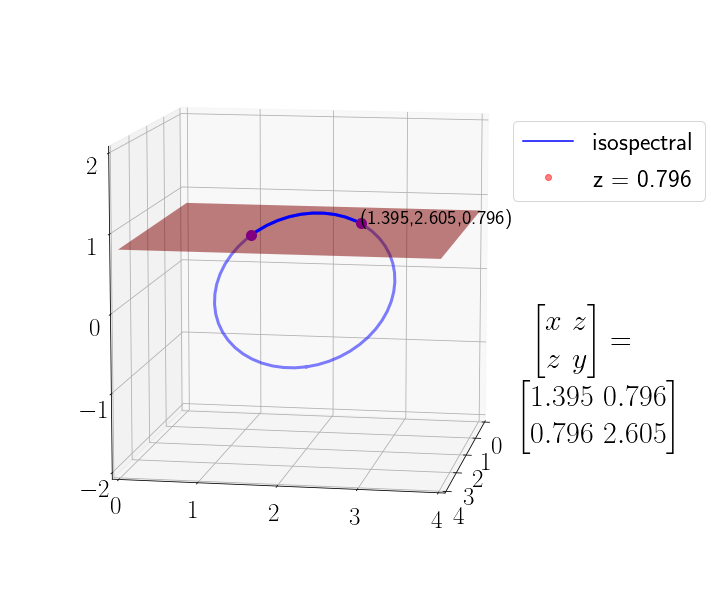

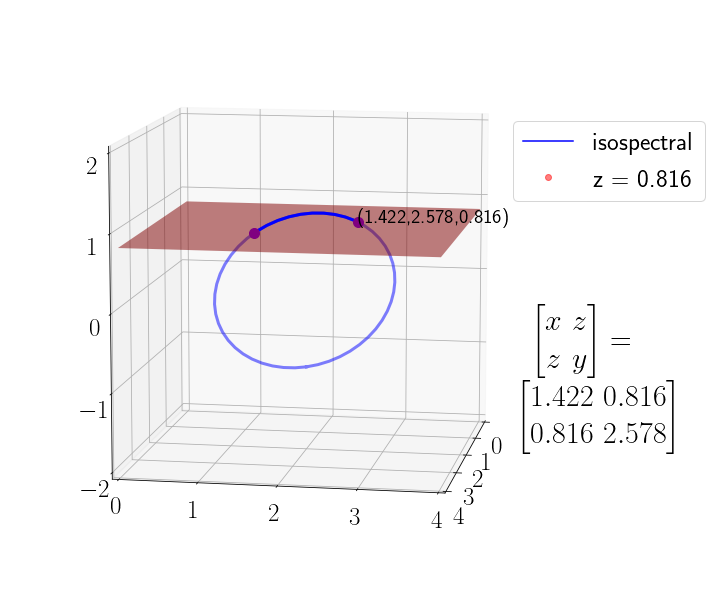

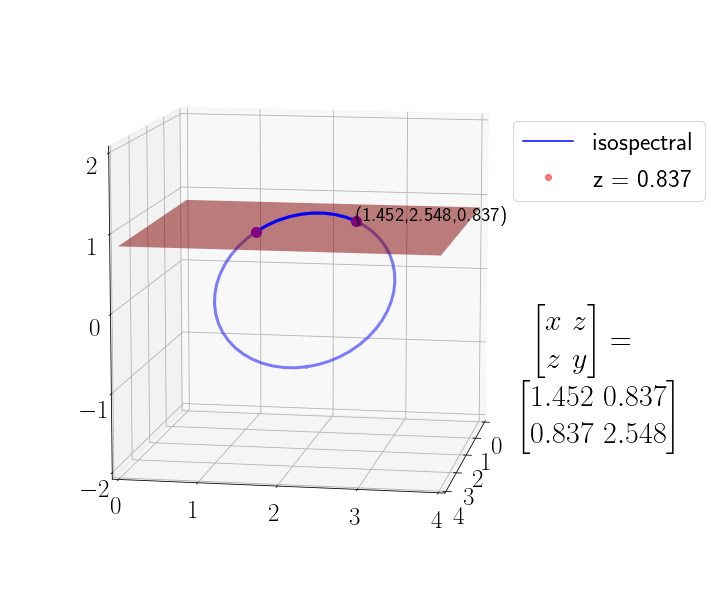

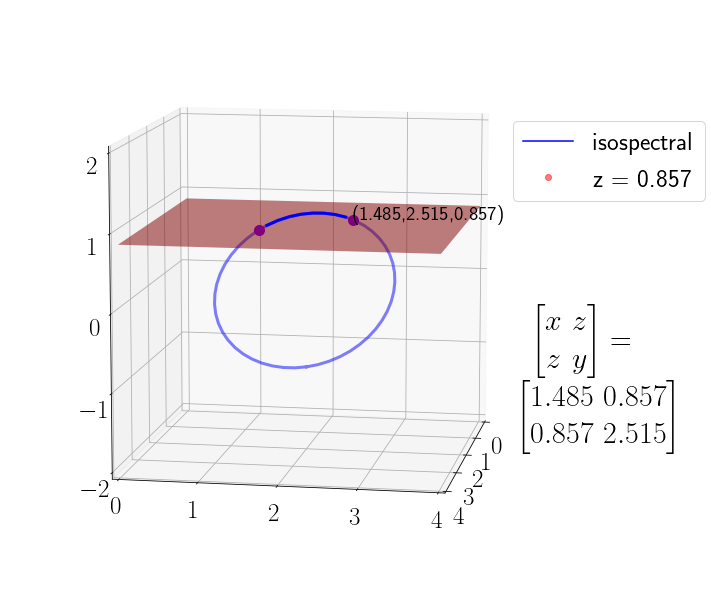

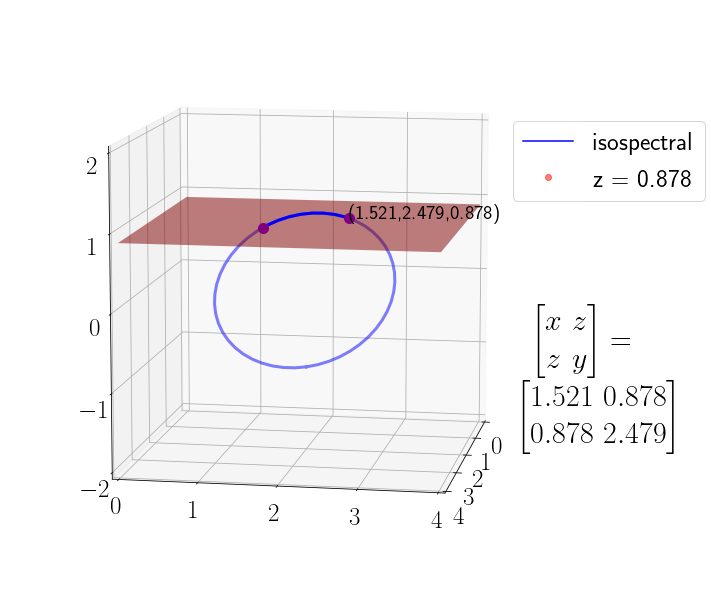

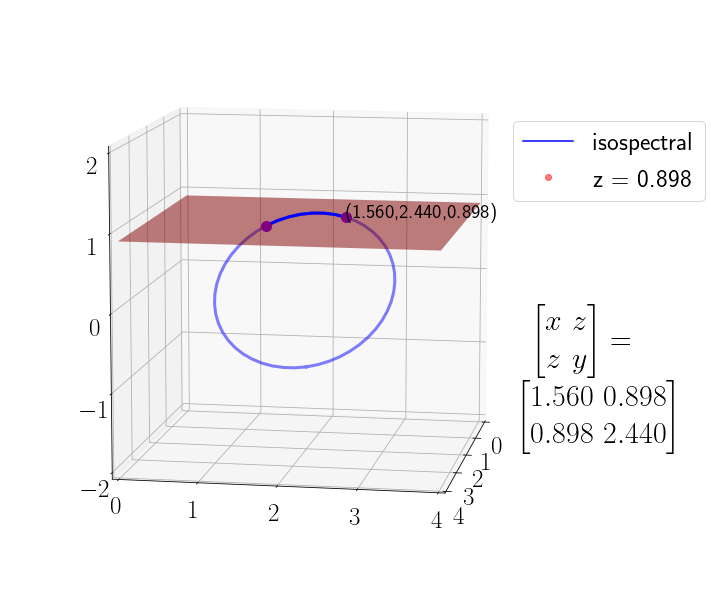

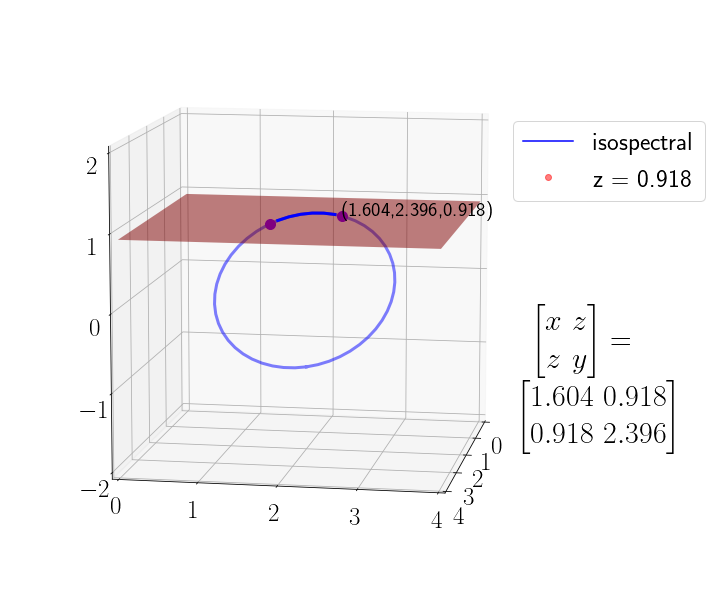

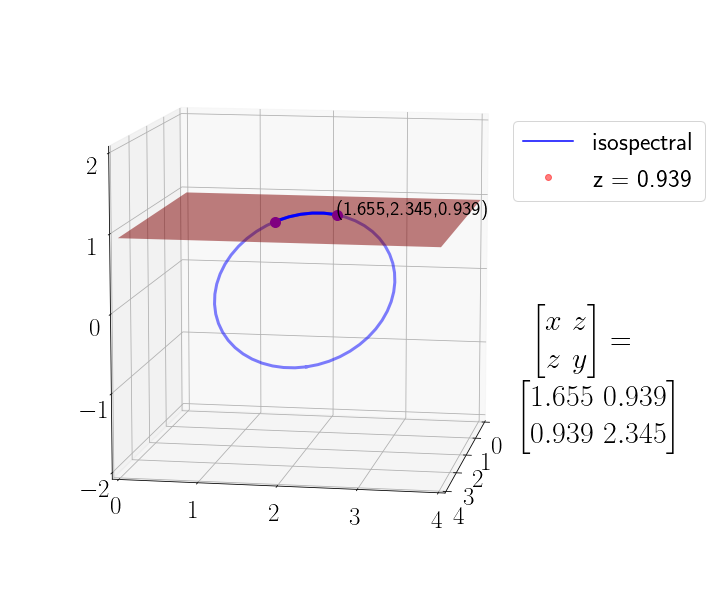

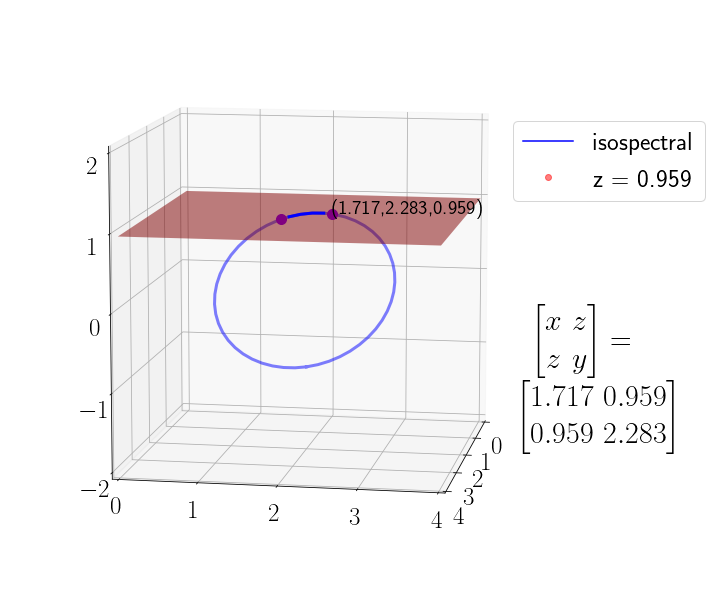

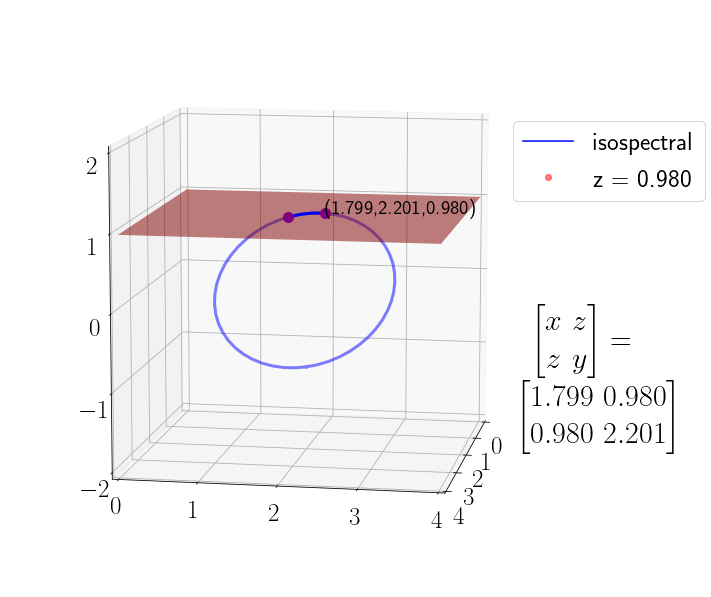

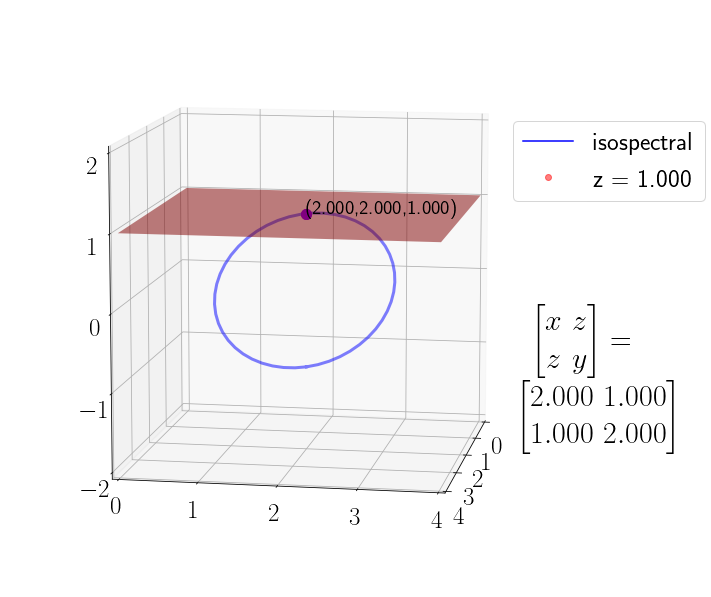

In [84]:
K = 50

#height = 0.222
heights = np.linspace(0,1,K)
for step in range(K):
    height = heights[step]

    mpl.rcParams['font.size'] = 25

    a12 = height # z
    a11 = float(2 - sqrt(1 - height**2)) #x
    a22 = float(2 + sqrt(1 - height**2)) #y

    fig = plt.figure(figsize=[10,8])
    ax = fig.add_axes([0,0,0.8,1], projection='3d')
    side = fig.add_axes([0.67,0.4,0.2,0.2])

    ax.view_init(10, 10)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.set_zlim(-2,2)

    theta = np.linspace(-0.5*float(pi), float(1.5*pi), 50)
    x = 2 - np.cos(theta)
    y = 2 + np.cos(theta)
    z = np.sin(theta)
    above = (z > height)
    ax.plot(x, y, z, 
            linewidth=3, 
            alpha=0.5, 
            zorder=-1, 
            color='b')
    ax.plot(x[above], y[above], z[above], 
            linewidth=3, 
            zorder=1, 
            color='b')

    mesh = np.meshgrid([0,4],[0,4])
    plane = np.zeros_like(mesh[0]) + height
    ax.plot_surface(mesh[0], mesh[1], plane, 
                    alpha=0.5, 
                    color='r')

    ax.plot([a11,a22], [a22,a11], [a12,a12], c='purple', linestyle="none", marker='o', markersize=10)

    mpl.rcParams['font.size'] = 20
    ax.text(a11,a22,a12,'(%.3f,%.3f,%.3f)'%(a11,a22,a12))

    fakeiso = mpl.lines.Line2D([0],[0], linestyle="-", c='b')
    fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='r', marker = 'o', alpha=0.5)
    ax.legend((fakeiso,fake2Dline), 
              ('isospectral', 'z = %.3f'%height),
              loc='upper left',
              bbox_to_anchor=(0.85, 0.83),
              fontsize=25
             )

    mpl.rcParams['font.size'] = 30
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

    side.axis('off')
    side.set_xlim(0,1)
    side.set_ylim(0,1)
    side.text(0.2,-0.2,r'$\begin{bmatrix}x&z\\z&y\end{bmatrix}=\\\begin{bmatrix}%.3f&%.3f\\%.3f&%.3f\end{bmatrix}$'
              %(a11,a12,a12,a22),
              verticalalignment='center')
    
    filename = 'iso-src/iso%03d.png'%step
    print('Writing to', filename, ', height is', height)
    fig.savefig(filename)
    print('Cropping', filename)
    img = plt.imread(filename)
    #plt.imshow(img[100:537,60:,:])
    plt.imsave(filename, img[100:537,60:,:])

In [88]:
import imageio
with imageio.get_writer('Perturbation.gif', mode='I') as writer:
    for step in range(0,K,1):
        filename = 'iso-src/iso%03d.png'%step
        image = imageio.imread(filename)
        ### add extra frame for the beginning and the end
        if step == 0 or step == K-1:
            for _ in range(9):
                writer.append_data(image)
        writer.append_data(image)

('Writing to', 'iso-src/static-iso000.png', ', height is', 0.0)
('Cropping', 'iso-src/static-iso000.png')


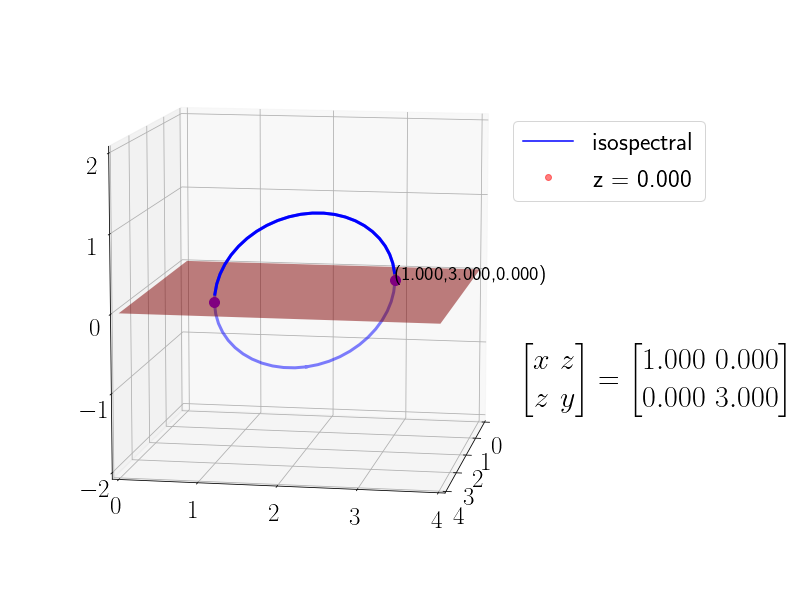

In [33]:
### generate one picture only
### change figsize and axes

K = 50

#height = 0.222
heights = np.linspace(0,1,K)
for step in [0]:
    height = heights[step]

    mpl.rcParams['font.size'] = 25

    a12 = height # z
    a11 = float(2 - sqrt(1 - height**2)) #x
    a22 = float(2 + sqrt(1 - height**2)) #y

    fig = plt.figure(figsize=[11,8])
    ax = fig.add_axes([0,0,0.8*(10/11),1], projection='3d')
    side = fig.add_axes([0.67*(10/11),0.4,0.2,0.2])

    ax.view_init(10, 10)
    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.set_zlim(-2,2)

    theta = np.linspace(-0.5*float(pi), float(1.5*pi), 50)
    x = 2 - np.cos(theta)
    y = 2 + np.cos(theta)
    z = np.sin(theta)
    above = (z > height)
    ax.plot(x, y, z, 
            linewidth=3, 
            alpha=0.5, 
            zorder=-1, 
            color='b')
    ax.plot(x[above], y[above], z[above], 
            linewidth=3, 
            zorder=1, 
            color='b')

    mesh = np.meshgrid([0,4],[0,4])
    plane = np.zeros_like(mesh[0]) + height
    ax.plot_surface(mesh[0], mesh[1], plane, 
                    alpha=0.5, 
                    color='r')

    ax.plot([a11,a22], [a22,a11], [a12,a12], c='purple', linestyle="none", marker='o', markersize=10)

    mpl.rcParams['font.size'] = 20
    ax.text(a11,a22,a12,'(%.3f,%.3f,%.3f)'%(a11,a22,a12))

    fakeiso = mpl.lines.Line2D([0],[0], linestyle="-", c='b')
    fake2Dline = mpl.lines.Line2D([0],[0], linestyle="none", c='r', marker = 'o', alpha=0.5)
    ax.legend((fakeiso,fake2Dline), 
              ('isospectral', 'z = %.3f'%height),
              loc='upper left',
              bbox_to_anchor=(0.85, 0.83),
              fontsize=25
             )

    mpl.rcParams['font.size'] = 30
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

    side.axis('off')
    side.set_xlim(0,1)
    side.set_ylim(0,1)
    side.text(0.2,-0.2,r'$\begin{bmatrix}x&z\\z&y\end{bmatrix}=\begin{bmatrix}%.3f&%.3f\\%.3f&%.3f\end{bmatrix}$'
              %(a11,a12,a12,a22),
              verticalalignment='center')
    
    filename = 'iso-src/static-iso%03d.png'%step
    print('Writing to', filename, ', height is', height)
    fig.savefig(filename)
    fig.show()
    print('Cropping', filename)
    img = plt.imread(filename)
    #plt.imshow(img[100:537,60:,:])
    plt.imsave(filename, img[100:537,60:,:])

In [25]:
load("https://raw.githubusercontent.com/jephianlin/minimum_rank_aux/master/load_all.py");

Loading general_Lib.sage...
---sshow, multi_sshow, tuple_generator, minimal_graphs, empty_array, all_one_matrix, elementary_matrix, eigens_multi, sort_dictionary, has_minor, etc.
Loading oc_diag_analysis.sage...
---gZ_leq, find_gZ, find_EZ, diagonal_analysis, etc.
Loading xi_dict.py...
---SAPreduced_matrix, has_SAP, find_ZFloor, Zsap, etc.
Loading mu_dict.py...
---get_mu_from_dict, find_mu, etc.
Loading SXP.sage...
This code contains extra copy of Z_game, Zell_game, Zplus_game, for the completeness of Zsap_game program.
